Importing libraries

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set() # all plot will cover on seaborn style

In [3]:
# Loading the data.
car = pd.read_csv('Car_cleaned_with_Model.csv')
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Now I will create a dictionary for every categorical column for getting their dummy number for their categorical label. It will be used in later stage in time of web app creation. 

In [5]:
# creating dictionary for every categorical column
brand_dic = dict()
body_dic = dict()
engine_type_dic = dict()
registration_dic = dict()
model_dic =dict()

In [19]:
# Creating encoding column for categorical columns only
from sklearn.preprocessing import LabelEncoder
# creating an instance of the labelEncoder
le = LabelEncoder()


# Brand column
car['brand_enc'] = le.fit_transform(car['Brand'])
for num, lbl in enumerate(le.classes_):
  brand_dic[lbl] = num
print('Brand Label saved')

# Body column
car['body_enc'] = le.fit_transform(car['Body'])
for num, lbl in enumerate(le.classes_):
  body_dic[lbl] = num
print('Body label saved')


# Engine type
car['engine_type_enc'] = le.fit_transform(car['Engine Type'])
for num, lbl in enumerate(le.classes_):
  engine_type_dic[lbl]=num
print('Engine type label saved')

# Registration column
car['regis_enc'] = le.fit_transform(car['Registration'])
for num, lbl in enumerate(le.classes_):
  registration_dic[lbl]=num
print('Registration label saved')

# Model
car['model_enc'] = le.fit_transform(car['Model'])
for num, lbl in enumerate(le.classes_):
  model_dic[lbl]=num
print('Model label saved')

# dropping the old categorical column
car_2 = car.drop(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], axis=1)

car_2.head()

Brand Label saved
Body label saved
Engine type label saved
Registration label saved
Model label saved


,Price,Mileage,EngineV,Year,brand_enc,body_enc,engine_type_enc,regis_enc,model_enc
0,4200.0,277,2.0,1991,1,3,3,1,17
1,7900.0,427,2.9,1999,2,5,0,1,248
2,13300.0,358,5.0,2003,2,3,1,1,222
3,23000.0,240,4.2,2007,0,0,3,1,211
4,18300.0,120,2.0,2011,5,0,3,1,214


In [20]:
# taking X and y
X = car_2.drop('Price', axis=1)
y = car_2['Price']

X.shape, y.shape

((3867, 8), (3867,))

In [21]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 8), (3093,), (774, 8), (774,))

In [23]:
# importing RandomForest Regressor
from sklearn.ensemble import  RandomForestRegressor

# creating instance of random forest regressor
rf_1 = RandomForestRegressor()

# checking the hyperparameter of the randomforest 
rf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:
# first i will create a base model then i will go for hyperparameter tuning.
rf_1.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
# checking the performance on the training
y_pred_train = rf_1.predict(X_train)

# importing the rmse from sklearn
from sklearn.metrics import  mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))


RMSE on Traning data 2021.7378647863472


In [32]:
# error on testing data
y_pred_test = rf_1.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

RMSE on Testing data 4955.426556979572


In [33]:
# checking the score on traning data.
from sklearn.metrics import r2_score

y_pred_train = rf_1.predict(X_train)

print('Traning Score: {}'.format(r2_score(y_train, y_pred_train)))

Traning Score: 0.9884499582845352


In [35]:
# checking the score on test data.

y_pred_test = rf_1.predict(X_test)
print('Testing Score: {}'.format(r2_score(y_test, y_pred_test)))

Testing Score: 0.9393789249627081


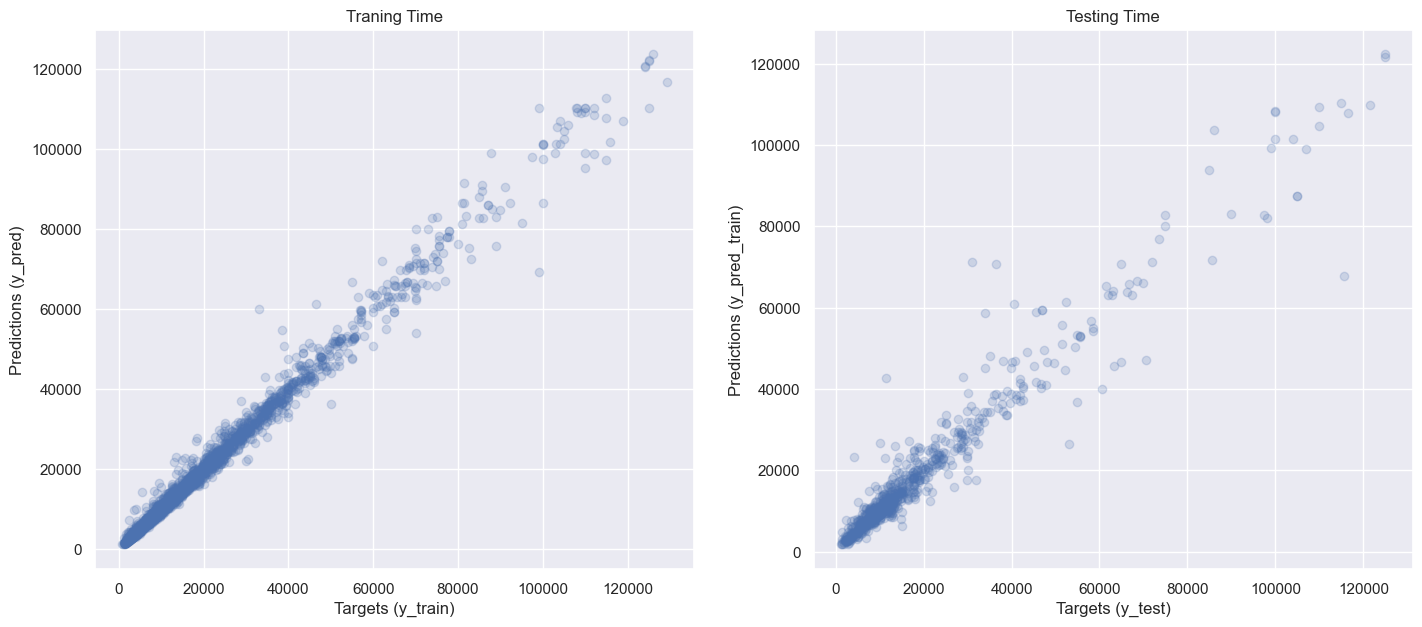

In [36]:
# plotting the traning data
# check the prediction with the original values
plt.figure(figsize=(17,7))
y_pred_train = rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Traning Time');

# plotting testing error
y_pred_test = rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');


## Checking the residual for base model.

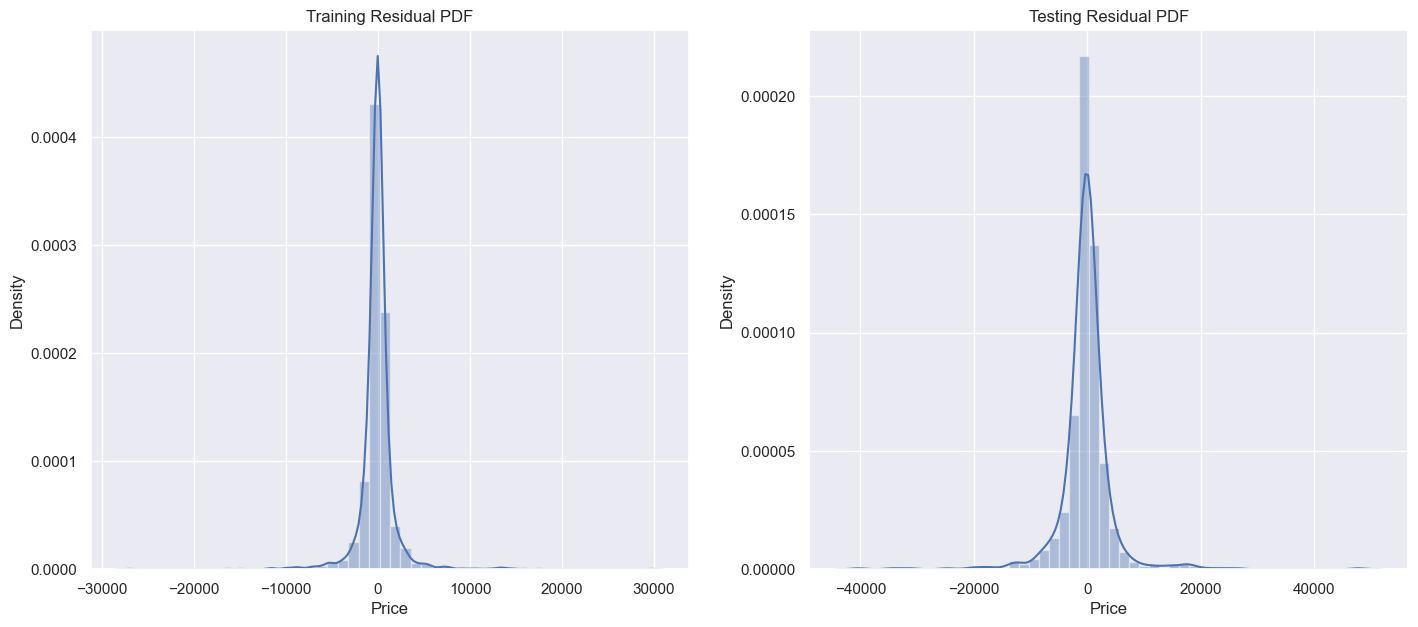

In [38]:
# plotting the distribution of the residual
residual_train = (y_train - rf_1.predict(X_train))
residual_test = (y_test - rf_1.predict(X_test))

# plotting the distribution of the residual on training
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train);
plt.title('Training Residual PDF');

# plotting the distribution of the residual
plt.subplot(1,2,2)
sns.distplot(residual_test);
plt.title('Testing Residual PDF');

In [43]:
# Creating a dataframe to compare the result and prediction.
df_eval = pd.DataFrame(rf_1.predict(X_test), columns=['Prediction'])
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Target'] = y_test

# creating residual columns and difference column
df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Target']*100)
# checking the performance data 
df_eval

,Prediction,Target,Residual,Difference%
0,17696.350000,19000.0,1303.650000,6.861316
1,6085.660000,5500.0,-585.660000,10.648364
2,25497.470000,19200.0,-6297.470000,32.799323
3,12764.493333,11900.0,-864.493333,7.264650
4,9012.390000,7750.0,-1262.390000,16.288903
...,...,...,...,...
769,107765.990000,116500.0,8734.010000,7.497004
770,10931.376667,13200.0,2268.623333,17.186540
771,28143.916667,27500.0,-643.916667,2.341515
772,14836.020000,16500.0,1663.980000,10.084727


In [44]:
# description of the eval_df
df_eval.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,18804.153971,18602.017829,-202.136142,16.905961
std,19482.637188,20139.559184,4954.503805,28.191495
min,1765.170000,1200.000000,-40280.890000,0.004902
25%,7799.367500,7500.000000,-1282.347500,4.223376
50%,11887.540000,11900.000000,-139.300000,9.523803
75%,21796.232500,20999.060000,1073.605000,20.075284
max,122285.000000,125000.000000,47838.085000,467.583659


### Now I will tune the hyperparameter to make more generalize model.

In [45]:
# starting hyperparameter tuning

# performing hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# creating instance of RandomForest 
rf_random = RandomForestRegressor()

# creating random parameter
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None], # maximum number of levels in each decision tree
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 7],
 'n_estimators': [100,200]} # how many decision trees

# create an instance of randomsearch csv
rf_random = RandomizedSearchCV(estimator=rf_random,
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3,
                               verbose=8,
                               n_jobs=-1)

# starting the search
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 200]},
                   verbose=8)

In [48]:
rf_random.best_estimator_, rf_random.best_params_, rf_random.best_score_ # checking score of the randomly tune parameter

(RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt'),
 {'n_estimators': 100,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 40,
  'bootstrap': False},
 0.925444589180922)

In [49]:
# checking traning error
np.sqrt(mean_squared_error(y_train, rf_random.predict(X_train)))

630.1801449067054

In [51]:
# checking the testing error
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

4125.043665013834

Looks like the model is still on overfit. It make traning error is `630` and testing error `4125`.

Now I will try with `GridSearchCV`

In [57]:
# importing gridseach cv
from sklearn.model_selection import GridSearchCV

# create an instance of new model
rf_grid_model = RandomForestRegressor()


param_grid =  {'bootstrap': [False],
  'max_depth': [25,30,35],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1,2],
  'min_samples_split': [1,2,3],
  'n_estimators': [100,150,200]}


# searching for best parameter
rf_grid = GridSearchCV(estimator=rf_grid_model,
                       param_grid=param_grid,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)


# fitting on data
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [25, 30, 35],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]},
             verbose=8)

In [58]:
rf_grid.best_estimator_, rf_grid.best_params_, rf_grid.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_split=3, n_estimators=150),
 {'bootstrap': False,
  'max_depth': 30,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'n_estimators': 150},
 0.9279073102776003)

In [59]:
# checking score of the randomly tune parameter
# checking traning error
np.sqrt(mean_squared_error(y_train, rf_grid.predict(X_train)))

981.27713477789

In [60]:
# checking the testing error
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

4125.043665013834

#### Again i will try GridSearchCV for find the best model

In [61]:
# create an instance of new model
rf_grid_model_2 = RandomForestRegressor()


param_grid_2 =  {'bootstrap': [False],
  'max_depth': [28,30,32],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1],
  'min_samples_split': [2,3,4],
  'n_estimators': [50,80,100]}


# searching for best parameter
rf_grid_2 = GridSearchCV(estimator=rf_grid_model_2,
                       param_grid=param_grid_2,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)


# fitting on data
rf_grid_2.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [28, 30, 32],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             verbose=8)

In [62]:
rf_grid_2.best_estimator_, rf_grid_2.best_params_, rf_grid_2.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=32, max_features='sqrt',
                       min_samples_split=4),
 {'bootstrap': False,
  'max_depth': 32,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 4,
  'n_estimators': 100},
 0.9286618617922328)

In [63]:
# Checking traning error.
np.sqrt(mean_squared_error(y_train, rf_grid_2.predict(X_train)))

1387.826054115448

In [64]:
# checking testing error
np.sqrt(mean_squared_error(y_test, rf_grid_2.predict(X_test)))

4282.111057152713

Now this model can be used, although there is lot difference in traning error and testing error but the difference is much less compared to the other tuned parameters

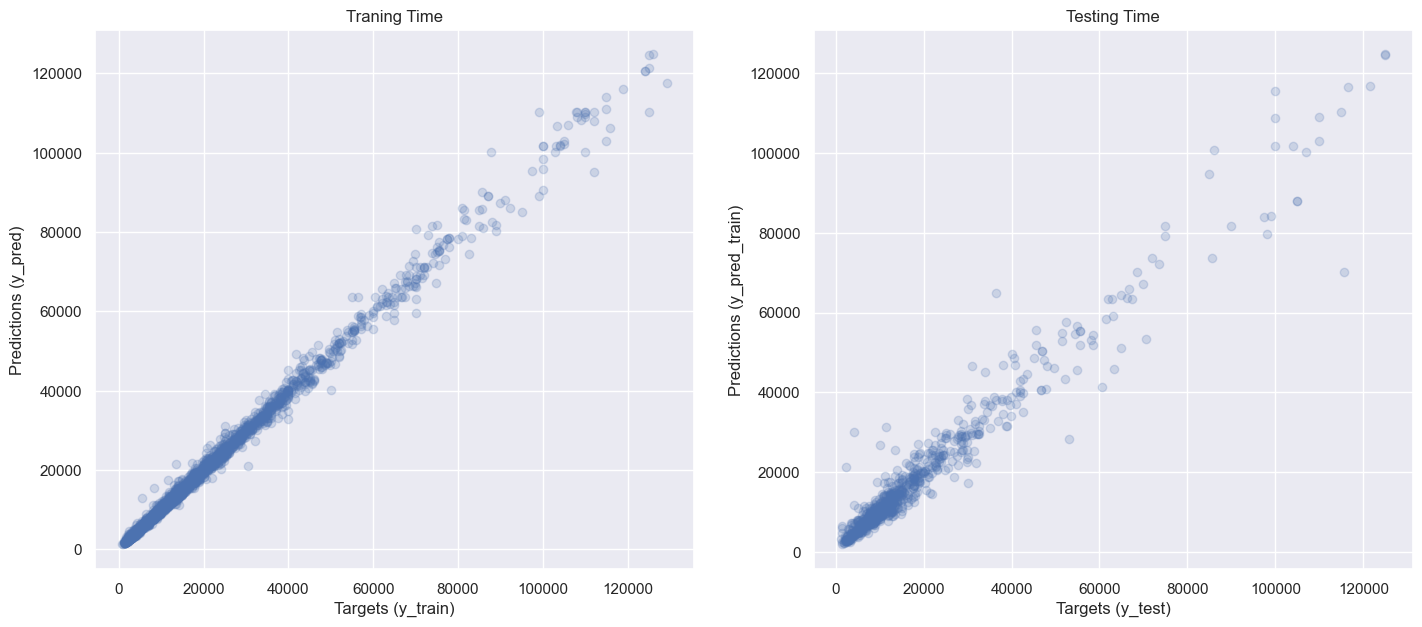

In [67]:
# plotting the traning
# check the prediction with the original values
plt.figure(figsize=(17,7))
y_pred_train = rf_grid_2.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Traning Time');

# plotting testing error
y_pred_test = rf_grid_2.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');


from the above graphs, its evident that the traning data is vrty fine and the error is less, meanwhile the test data is not as fine as the training data.

In [70]:
# checking the score of the last model
from sklearn.metrics import r2_score

print(f'Training r2_score: {r2_score(y_train, rf_grid_2.predict(X_train))}')
print(f'Testing r2_score: {r2_score(y_test, rf_grid_2.predict(X_test))}')

Training r2_score: 0.9945574311015838
Testing r2_score: 0.9547334496755334


# Now checking the residual

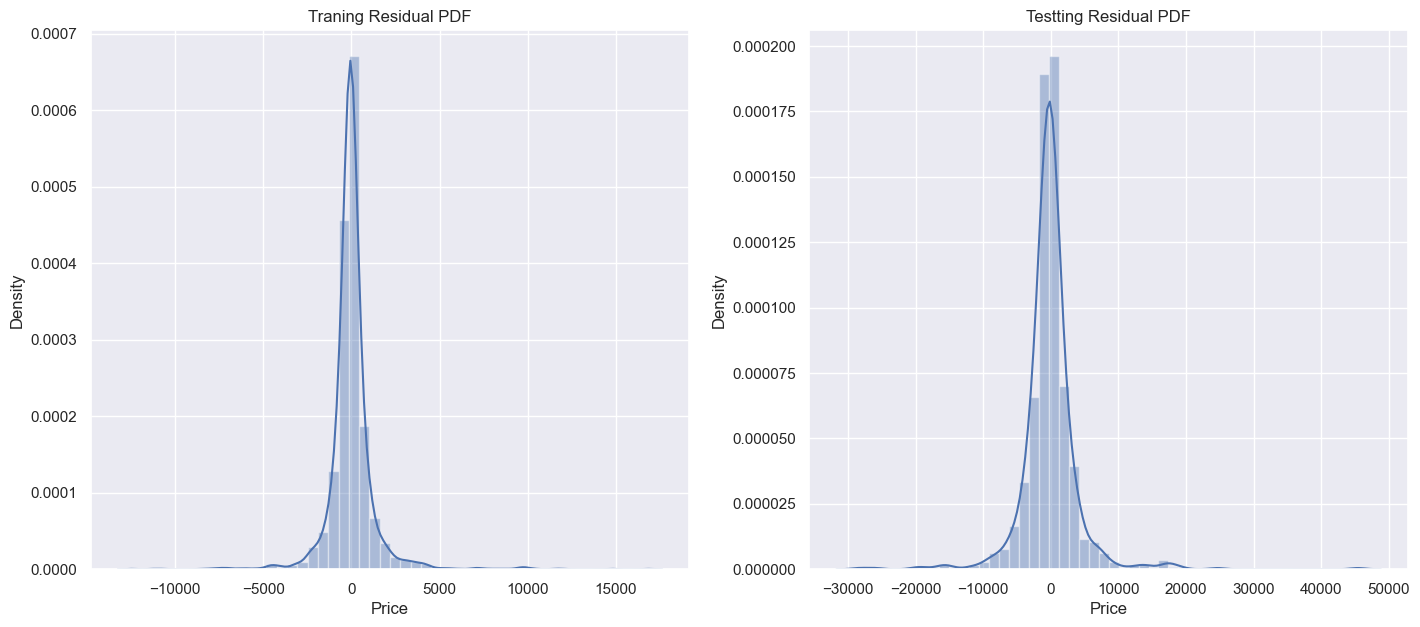

In [71]:
# plotting the distribution of the residual
residual_train = (y_train - rf_grid_2.predict(X_train))
residual_test = (y_test - rf_grid_2.predict(X_test))

# ploting the distribution of the residual on training
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train);
plt.title('Traning Residual PDF');

# ploting the distribution of the residual on testing
plt.subplot(1,2,2)
sns.distplot(residual_test);
plt.title('Testting Residual PDF');

Not that much Bad, and far better than Linear Regression.

Most of the data are lie on `0`, it meas most of the cases it makes right decision.

Creating df_eval like Linear Regression

In [72]:
# Creating a dataframe to compare the result and prediction.
df_eval = pd.DataFrame(rf_grid_2.predict(X_test), columns=['Prediction'])
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Target'] = y_test

# creating residual columns and difference column
df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Target']*100)
# checking the performance data 
df_eval

,Prediction,Target,Residual,Difference%
0,17662.091967,19000.0,1337.908033,7.041621
1,4935.243333,5500.0,564.756667,10.268303
2,24720.571667,19200.0,-5520.571667,28.752977
3,12152.520000,11900.0,-252.520000,2.122017
4,7778.825000,7750.0,-28.825000,0.371935
...,...,...,...,...
769,116553.363333,116500.0,-53.363333,0.045805
770,11357.588333,13200.0,1842.411667,13.957664
771,28266.666667,27500.0,-766.666667,2.787879
772,14488.958333,16500.0,2011.041667,12.188131


In [73]:
df_eval.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,18747.667816,18602.017829,-145.649987,18.416997
std,19274.720192,20139.559184,4282.400603,43.783885
min,1846.235000,1200.000000,-28332.733333,0.021045
25%,7850.558750,7500.000000,-1462.296250,4.592672
50%,11838.615000,11900.000000,-239.234167,10.332223
75%,21800.530000,20999.060000,998.232500,20.096280
max,124700.666667,125000.000000,45434.774200,789.292778


the difference is far much better than Linear Regression

In [77]:
import joblib

# saving the first base model.
joblib.dump(rf_1, 'rf1_base_rf.pkl', compress=3)

['rf1_base_rf.pkl']